# Colab (If necessary)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/Shareddrives/DAScripts/Consegna Esame/Seconda Parte")

# Utils Functions

In [3]:
import scipy.io as sio
import numpy as np
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

"""
This script implements a gradient descent algorithm to train a logistic regression model. The input consists of two lists of training examples (x_list and y_list),
 a set of test examples (X_test), the number of features in each example (p), the step size for gradient updates (stepSize), and the iteration step at which to make
predictions on the test examples (timeTest). The beta parameters of the model are initialized randomly using a seed value of 2023. The model then updates 
the beta parameters for each training example in the x_list and y_list. The prediction for each training example is made using the dot product of beta and x. 
The error for each training example is calculated using the logistic loss function. The gradient of the error with respect to the beta parameters is calculated 
and used to update beta using gradient descent. The script also makes predictions on the test examples at the iteration steps specified in timeTest and appends 
the results to the list test_preds. Finally, the script returns the list of test predictions and the mean error over all training examples.
"""

def gradient_descent(x_list,y_list,X_test,p,stepSize,timeTest):
    np.random.seed(seed=2023)
    beta=np.random.randn(1,p)
    tot_error = []
    test_preds = []

    pos=0
    for i,tmp in enumerate(zip(x_list,y_list)):
        x=tmp[0]
        y=tmp[1]
        y_pred = np.dot(beta,x)
        #log (1 + e^−y x⊤β)
        istant_error = math.log(1 + math.exp(-y*y_pred))
        tot_error.append(istant_error)
        grads = (-y*x)/(1 + math.exp(y*y_pred))
        gradiente = np.matrix(stepSize*grads)
        beta = beta - gradiente
        if i+1==timeTest[pos]:
          test_pred = np.dot(beta,X_test[pos])
          if test_pred>0:
            test_preds.append(1)
          else:
            test_preds.append(0)
          pos+=1
    return test_preds,np.mean(np.array(tot_error))

def evaluatePerformanceAndPhrase(X_train,X_test,y_train,time_test,p,step_size):

    test_predictions,tot_error = gradient_descent(X_train[:,:p],y_train,X_test[:,:p],p,step_size,time_test)
    for bit in range(int(len(test_predictions)/8)):
        tmp=test_predictions[(bit*8):(bit*8)+8]
        ret = "".join(str(e) for e in tmp)
        print(chr(int(ret, 2)))

# Data manipulation

##Train and test Data

In [ ]:
# Load train and test datasets
train_data = sio.loadmat('train_8feb23.mat')
test_data = sio.loadmat('test_8feb23.mat')

In [ ]:
print(train_data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: lun feb  6 14:20:18 2023', '__version__': '1.0', '__globals__': [], 'train': array([[  7.69968463,   8.42526179, -10.05247494, ...,  -4.74738658,
          1.72596027,   1.        ],
       [-12.06932205, -11.60885741,  14.16523163, ...,   6.55461929,
         -4.20657085,  -1.        ],
       [-12.35724123, -10.09117283,  12.71493662, ...,   5.71478506,
         -5.99292909,  -1.        ],
       ...,
       [-12.22878449, -14.70876432,  14.01820412, ...,   4.95012939,
         17.67737151,  -1.        ],
       [ 14.54288034,  13.25617874,  -8.31619124, ...,  -2.89070714,
        -17.88757621,   1.        ],
       [ 14.03889992,  13.31103433,  -9.04225543, ...,  -3.15426186,
        -17.64826713,   1.        ]])}


In [ ]:

# Splitting X and y in train and test
X_train = train_data['train'][:, :20]
y_train = train_data['train'][:, 20:]
X_test = test_data['test'][:, :20]
time_test = test_data['test'][:, 20:]


print("X train shape:", X_train.shape)
print("y train shape:", y_train.shape)
print('X_test shape',X_test.shape)
print('y_test shape',time_test.shape)
# Center the data set removing to each feature its mean
X_train = X_train - np.mean(X_train, axis=0)

X train shape: (24000, 20)
y train shape: (24000, 1)
X_test shape (80, 20)
y_test shape (80, 1)


##Stationarity of the Data

In [ ]:
def meanOfRange(data,start,end,i):
  return np.repeat(np.mean(data[start:end:,i]),end-start)

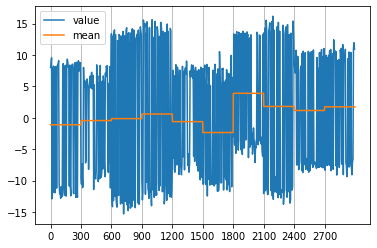

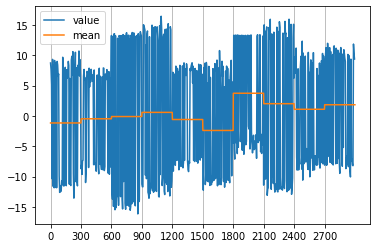

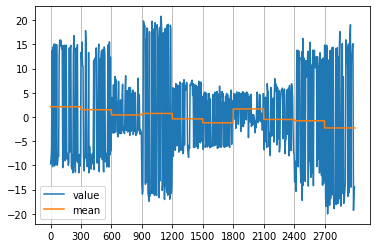

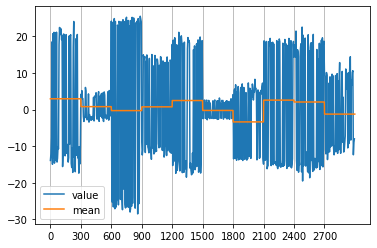

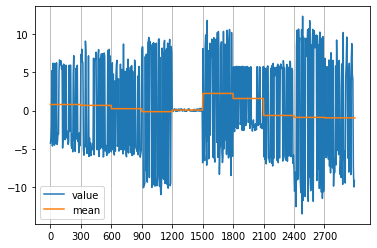

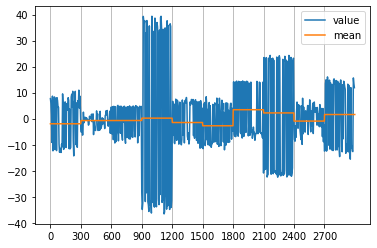

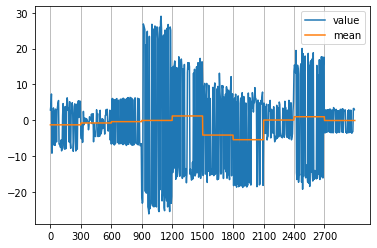

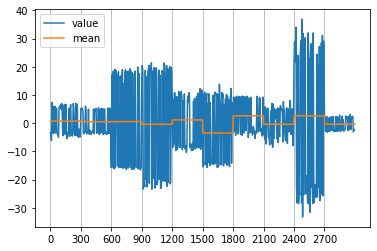

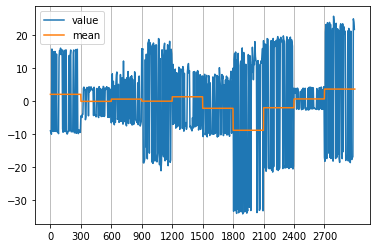

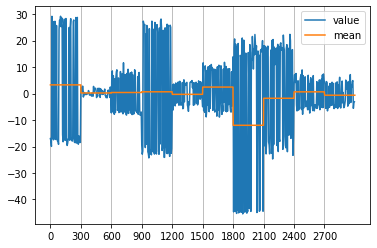

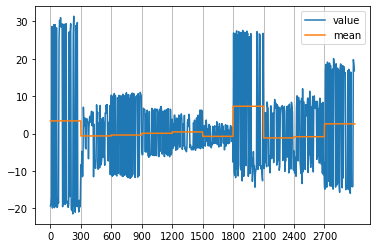

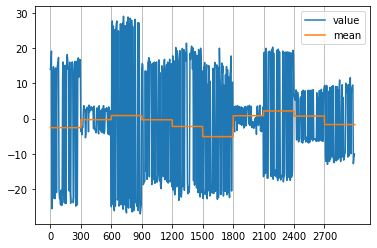

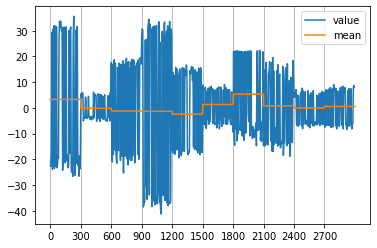

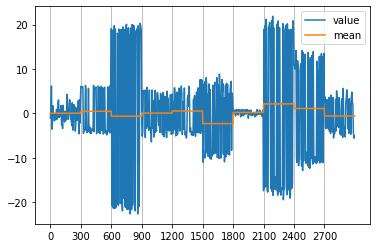

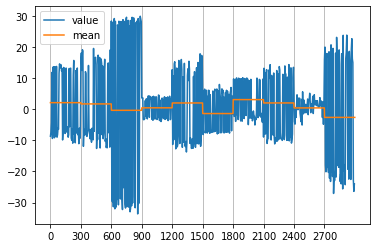

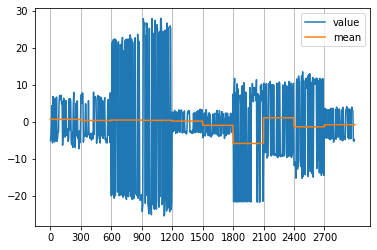

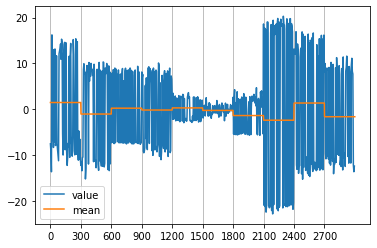

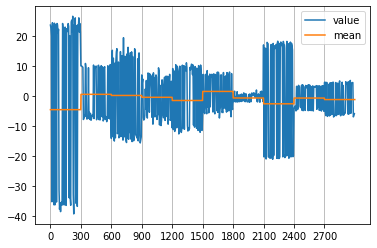

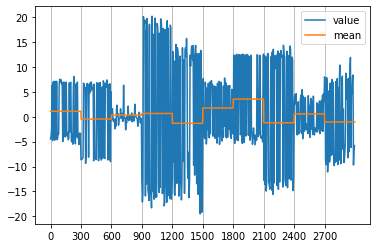

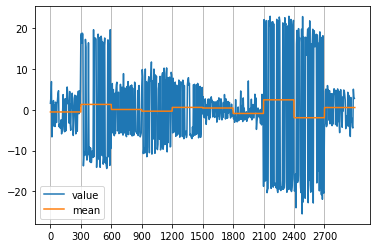

In [ ]:
step_size = 5
for i in range(0,20):
    fig, ax = plt.subplots()
    ax.plot(list(range(0,3000,step_size)),X_train[:3000:step_size,i], label='value')
    tempo_mean = np.array([])
    for x in range(0,10):
        tempo_mean = np.concatenate((tempo_mean,meanOfRange(X_train,x*300,(x+1)*300,i)))
    ax.plot(list(range(0,3000)),tempo_mean[:3000], label='mean')
    ax.set_xticks(np.arange(0, 3000, 300))
    ax.grid(True,axis='x')
    plt.legend()
    plt.show()

#Performing PCA

##Using EigenDecompisition

In [ ]:
# Method 1: eigendecomposition.  The covariance matrix of the X_train is calculated using the dot product of the transpose of X_train and X_train.
C = np.dot(np.transpose(X_train), X_train)
# The eigenvalues and eigenvectors are computed using the np.linalg.eig function. 
Lambda, W = np.linalg.eig(C)
#print(Lambda)
#The eigenvalues are sorted and reordered in descending order. The eigenvectors are also reordered in the same way.

idx = np.argsort(Lambda)[::-1]
Lambda = np.sort(Lambda)[::-1]
W = W[:, idx]

#The variance of the principal components is calculated by dividing the eigenvalues by n-1. 
print("Variance of the principal components (eigenvalues)", Lambda/(X_train.shape[0]-1))

#The script also checks the norm and dot product of the eigenvectors to verify that they are orthogonal. 
print("Norm of eigenvector 1 ", np.linalg.norm(W[:,0]))
print("Dot product between eigenvectors 1 and 2 ", np.dot(W[:,0], W[:,1]))

#Finally, the data is projected on the principal directions (eigenvectors) to obtain the principal components. 
# The same process is applied to the test data set X_test to obtain the T_eig_test.
T_eig = np.dot(X_train, W)
T_eig_test = np.dot(X_test, W)

Variance of the principal components (eigenvalues) [418.1008079  394.42530349 331.22698082 320.60717775 286.27406382
 266.27386575 237.42058187 211.30401032 190.69338247 178.99891168
 160.99779807 144.14080645 123.94907045 111.22171109 100.51378254
  81.12345511  71.81636167  63.58761934  57.28919399   0.95200543]
Norm of eigenvector 1  1.0
Dot product between eigenvectors 1 and 2  4.298644773470528e-15


#### Proportion of Variance explained

These two plots illustrate the proportion of variance explained by each principal component, as well as the cumulative proportion of variance explained by all components. As we can see, the first few components explain a significant portion of the variance in the data, indicating that these components contain most of the relevant information for understanding the underlying structure of the data.

Therefore, if the proportion of variance explained by the principal components calculated on scaled and unscaled data is similar, it indicates that the scale of the variables do not have a significant impact on the underlying structure of the data, and the results of the PCA calculation were not significantly affected by scaling the data. This was an example of this situation; the variance changes but not as much as we could expect.

original shape:    (24000, 20)
transformed shape: (24000, 20)


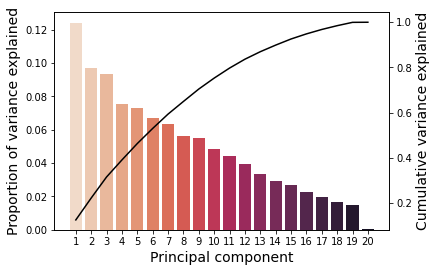

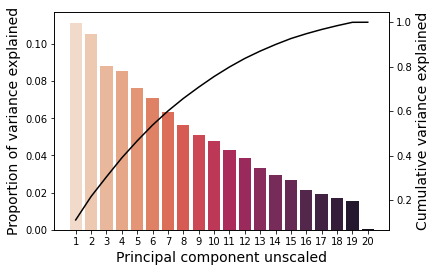

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#The script performs dimensionality reduction on a given training dataset "X_train" and test dataset "X_test" using the Principal Component Analysis (PCA) method. 
#It starts by scaling the training data "X_train" using "StandardScaler". Then, PCA is applied to the scaled training data, resulting in the transformed data "X_pca_scale".

#A similar PCA transformation is also performed on the original (unscaled) training data, resulting in "X_pca". 
scaler = StandardScaler()
X_scale = scaler.fit_transform(X_train)
pca_scale = PCA()
pca_scale.fit(X_scale)

X_pca_scale = pca_scale.transform(X_scale)
print("original shape:   ", X_scale.shape)
print("transformed shape:", X_pca_scale.shape)


pca = PCA()
pca.fit(X_train) 
X_pca = pca.transform(X_train)
#print(X_pca[:,:7])

#The explained variance ratio for each principal component is stored in the attributes "explained_variance_ratio_" of the PCA classes,
#and is plotted using bar plots and line plots to visualize the proportion of variance explained by each component and the cumulative variance explained by all the components. 
#The same PCA transformation is performed on the test data "X_test", resulting in "X_pca_test".
idx = np.arange(20)+1
df_explained_variance_scale = pd.DataFrame([pca_scale.explained_variance_ratio_, np.cumsum(pca_scale.explained_variance_ratio_)], 
                                     index=['Proportion of variance explained', 'cumulative'], 
                                     columns=idx).T

df_explained_variance = pd.DataFrame([pca.explained_variance_ratio_, np.cumsum(pca.explained_variance_ratio_)], 
                                     index=['Proportion of variance explained', 'cumulative'], 
                                     columns=idx).T

fig, ax1 = plt.subplots()
ax1.set_xlabel('Principal component', fontsize=14)
ax1.set_ylabel('Proportion of variance explained', fontsize=14)
ax2 = sns.barplot(x=idx, y='Proportion of variance explained', data=df_explained_variance_scale, palette='rocket_r')
ax2 = ax1.twinx()
ax2.grid(False)
ax2.set_ylabel('Cumulative variance explained', fontsize=14)
ax2 = sns.lineplot(x=idx-1, y='cumulative', data=df_explained_variance_scale, color='k')

# same plot but with unscaled data
fig, ax1 = plt.subplots()
ax1.set_xlabel('Principal component unscaled', fontsize=14)
ax1.set_ylabel('Proportion of variance explained', fontsize=14)
ax2 = sns.barplot(x=idx, y='Proportion of variance explained', data=df_explained_variance, palette='rocket_r')
ax2 = ax1.twinx()
ax2.grid(False)
ax2.set_ylabel('Cumulative variance explained', fontsize=14)
ax2 = sns.lineplot(x=idx-1, y='cumulative', data=df_explained_variance, color='k')

X_pca_test = pca.transform(X_test)

#

##Stationarity of principal components

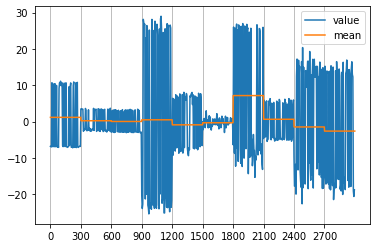

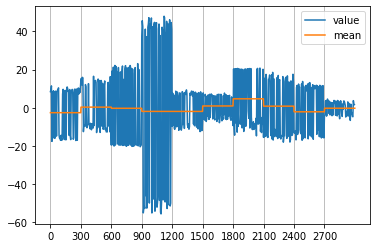

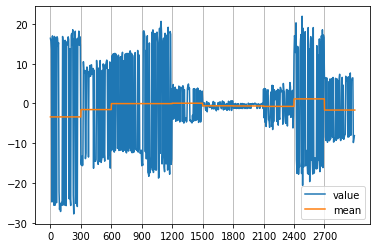

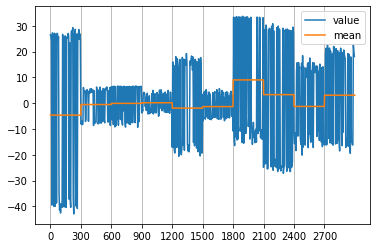

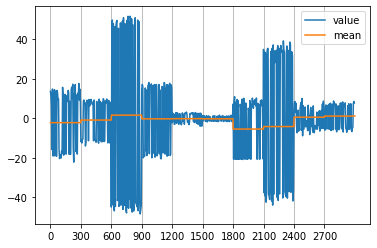

In [ ]:
step_size = 5
for i in range(0,5):
    fig, ax = plt.subplots()
    ax.plot(list(range(0,3000,step_size)),X_pca[:3000:step_size,i], label='value')
    tempo_mean = np.array([])
    for x in range(0,10):
        tempo_mean = np.concatenate((tempo_mean,meanOfRange(X_pca,x*300,(x+1)*300,i)))
    ax.plot(list(range(0,3000)),tempo_mean[:3000], label='mean')
    ax.set_xticks(np.arange(0, 3000, 300))
    ax.grid(True,axis='x')
    plt.legend()
    plt.show()

#Performing SGD with an empirical choice of step_size

In [ ]:
empirical_step_size = 0.01
p=5 #as explained above
test_preds,mean_error=gradient_descent(X_train[:,:p],y_train,X_test[:,:p],p,empirical_step_size,time_test)

##Prediction on test set

In [ ]:
evaluatePerformanceAndPhrase(X_train,X_test,y_train,time_test,p,empirical_step_size)

W
n
t
r
C
o
m
i
n
g


#Further Analysis on chosen parameters

##Analysis on training Data Prediction

In [ ]:
import scipy.io as sio
import numpy as np
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gradient_descent(x_list,y_list,X_test,p,stepSize,timeTest):
    np.random.seed(seed=2023)
    beta=np.random.randn(1,p)
    tot_error = []
    test_preds = []
    y_preds = []
    pos=0
    for i,tmp in enumerate(zip(x_list,y_list)):
        x=tmp[0]
        y=tmp[1]
        y_pred = np.dot(beta,x)
        if y_pred>0:
            y_preds.append(1!=y)
        else:
            y_preds.append(-1!=y)
        #log (1 + e^−y x⊤β)
        istant_error = math.log(1 + math.exp(-y*y_pred))
        tot_error.append(istant_error)
        grads = (-y*x)/(1 + math.exp(y*y_pred))
        gradiente = np.matrix(stepSize*grads)
        beta = beta - gradiente
        if i+1==timeTest[pos]:
          test_pred = np.dot(beta,X_test[pos])
          if test_pred>0:
            test_preds.append(1)
          else:
            test_preds.append(0)
          pos+=1
    return test_preds,np.mean(np.array(tot_error)),np.array(tot_error),np.array(y_preds)

def instant_error_on_training_data(X_train,X_test,y_train,time_test):
    predictor = []
    learning_rate = []
    MIE = []
    actual_min = (1000,1e-10,20)
    step_sizes = [5e-2,1e-2,1e-5,1e-7]
    print(X_train.shape[1])
    for p in tqdm([1,5,10,X_train.shape[1]]):#X_train.shape[1]
        preds_errors = []
        actual_min = (1000,1e-10,20)
        plt.figure(figsize=(29,6))
        for stepSize in step_sizes:#5e-2,1e-2,1e-5,1e-7
            test_predictions,mean_tot_error,tot_istant_err,tmp = gradient_descent(X_train[:,:p],y_train,X_test[:,:p],p,stepSize,time_test)
            preds_errors.extend(tmp)
            if actual_min[0] > mean_tot_error:
                actual_min = (mean_tot_error,stepSize,p)
            predictor.append(p)
            learning_rate.append(stepSize)
            MIE.append(mean_tot_error)
            # Change color based on MIE value
            print("the graphs below have step size: ",stepSize," and ",p," principal components")
            plt.plot( np.arange(len(tot_istant_err[:])),tot_istant_err[:],label=stepSize)
        plt.legend()
        plt.ylim(0,180)
        plt.show()
        plt.figure(figsize=(29,6))
        ind = step_sizes.index(actual_min[1])
        tmpMin = actual_min[2]
        test_predictions,mean_tot_error,tot_istant_err,preds_errors = gradient_descent(X_train[:,: tmpMin],y_train,X_test[:,:tmpMin],tmpMin,actual_min[1],time_test)
        rates = []
        raggroup = 30
        for v in range(int(24000/raggroup)):
          rates.append(sum(map(lambda x : x==0, (1*preds_errors[v*raggroup:(v+1)*raggroup])))/raggroup)
        plt.plot( np.arange(24000/raggroup),rates,'.')
        print("with ",p,"and step size",actual_min[1],"principal components the MIE is: ",mean_tot_error)
        # plt.ylim(0,1)
        # plt.show()
        # plt.figure(figsize=(20,6))
        # plt.plot( np.arange(3000),preds_errors[:3000],'.')
        # plt.show()
        # totalrate=sum(map(lambda x : x==0, (1*preds_errors)))/24000
        # print("il rate generale di errori sui totali analizzati: ",totalrate[0])
    print(f'Resolving phrase for min error: {actual_min[0]}, learning rate: {actual_min[1]} predictors: {actual_min[2]} ' )
    p = actual_min[2]
    for bit in range(int(len(test_predictions)/8)):
        tmp=test_predictions[(bit*8):(bit*8)+8]
        ret = "".join(str(e) for e in tmp)
        print(chr(int(ret, 2)))


20


  0%|          | 0/4 [00:00<?, ?it/s]

the graphs below have step size:  0.05  and  1  principal components
the graphs below have step size:  0.01  and  1  principal components
the graphs below have step size:  1e-05  and  1  principal components
the graphs below have step size:  1e-07  and  1  principal components


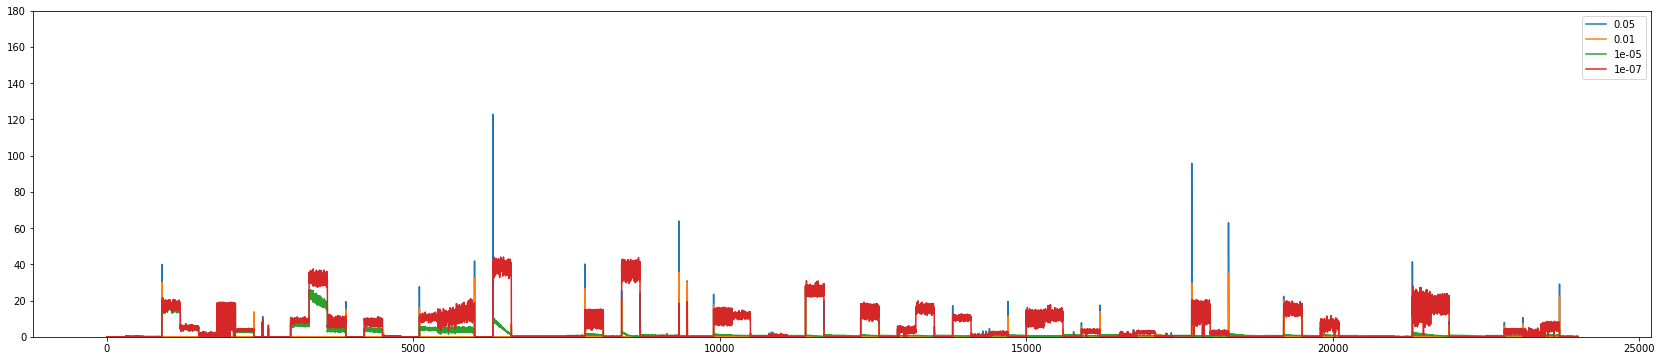

 25%|██▌       | 1/4 [00:10<00:30, 10.13s/it]

with  1 and step size 0.05 principal components the MIE is:  0.11840885303751203
the graphs below have step size:  0.05  and  5  principal components
the graphs below have step size:  0.01  and  5  principal components
the graphs below have step size:  1e-05  and  5  principal components
the graphs below have step size:  1e-07  and  5  principal components


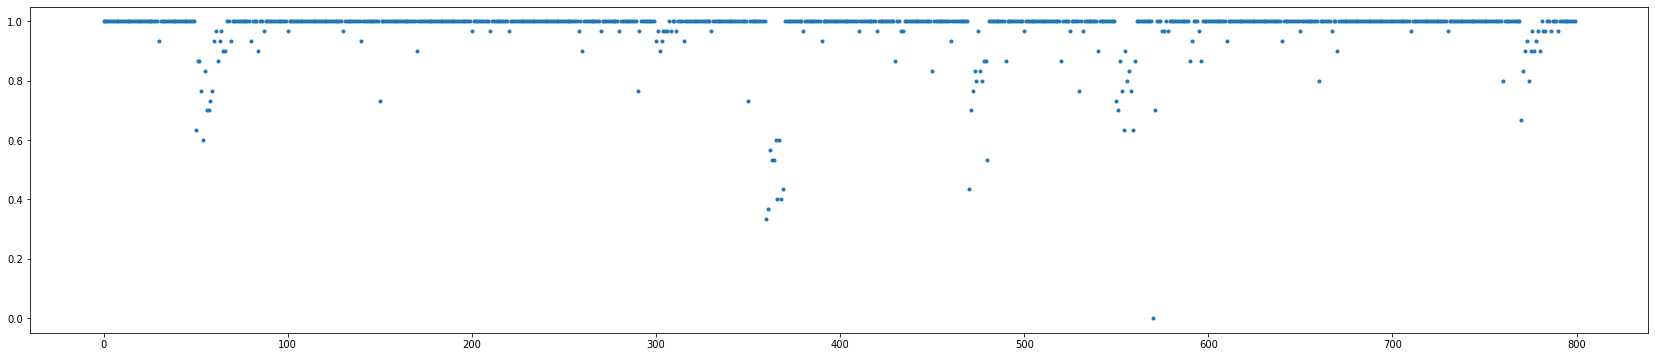

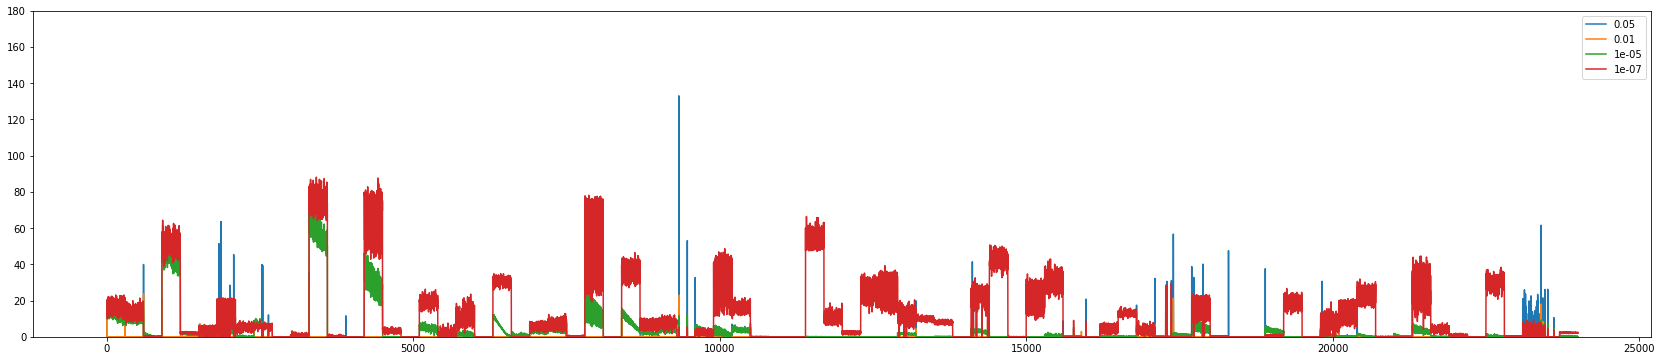

 50%|█████     | 2/4 [00:22<00:23, 11.60s/it]

with  5 and step size 0.01 principal components the MIE is:  0.036929657382087984
the graphs below have step size:  0.05  and  10  principal components
the graphs below have step size:  0.01  and  10  principal components
the graphs below have step size:  1e-05  and  10  principal components
the graphs below have step size:  1e-07  and  10  principal components


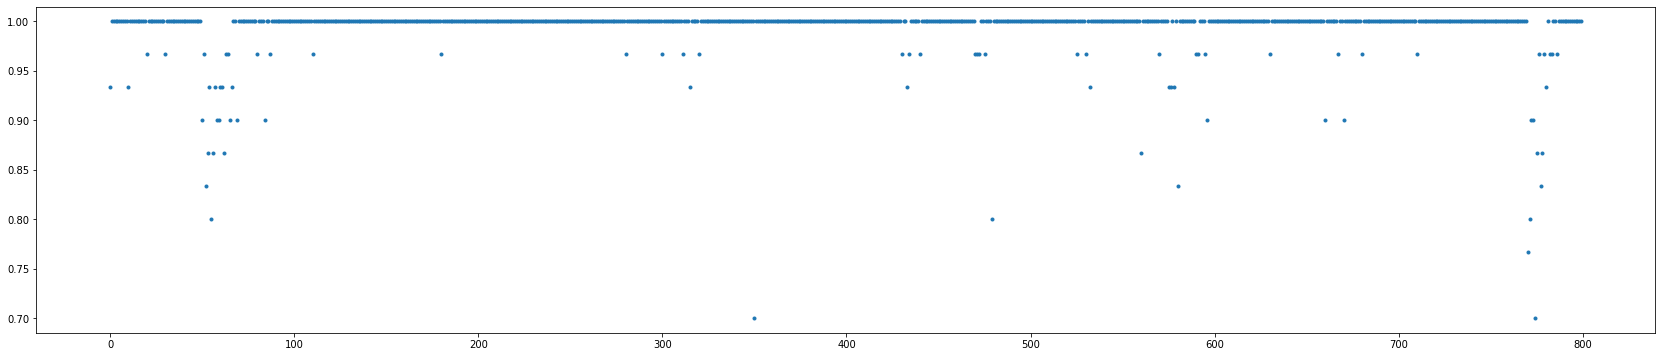

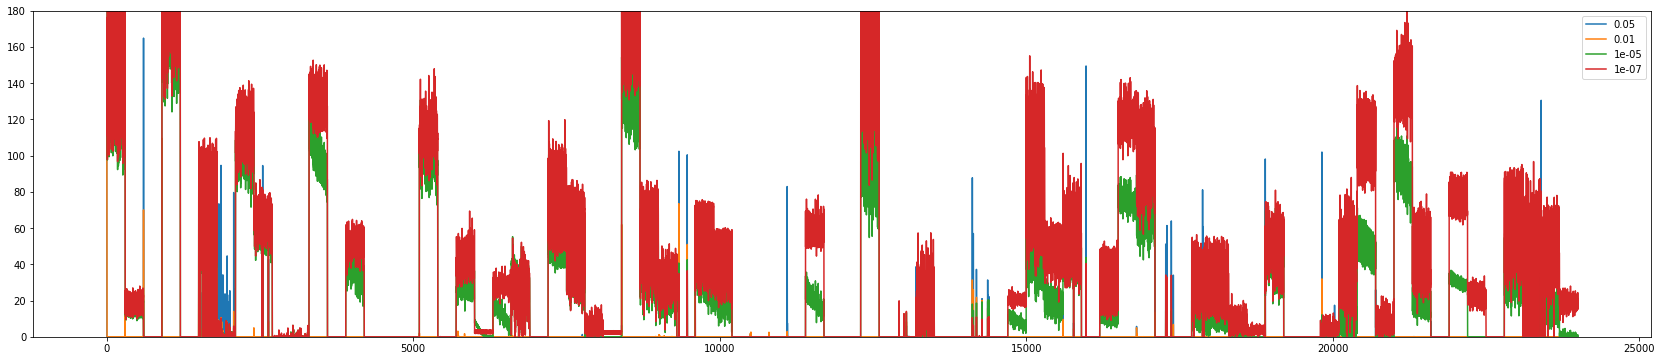

 75%|███████▌  | 3/4 [00:33<00:11, 11.18s/it]

with  10 and step size 0.01 principal components the MIE is:  0.09537683179493422
the graphs below have step size:  0.05  and  20  principal components
the graphs below have step size:  0.01  and  20  principal components
the graphs below have step size:  1e-05  and  20  principal components
the graphs below have step size:  1e-07  and  20  principal components


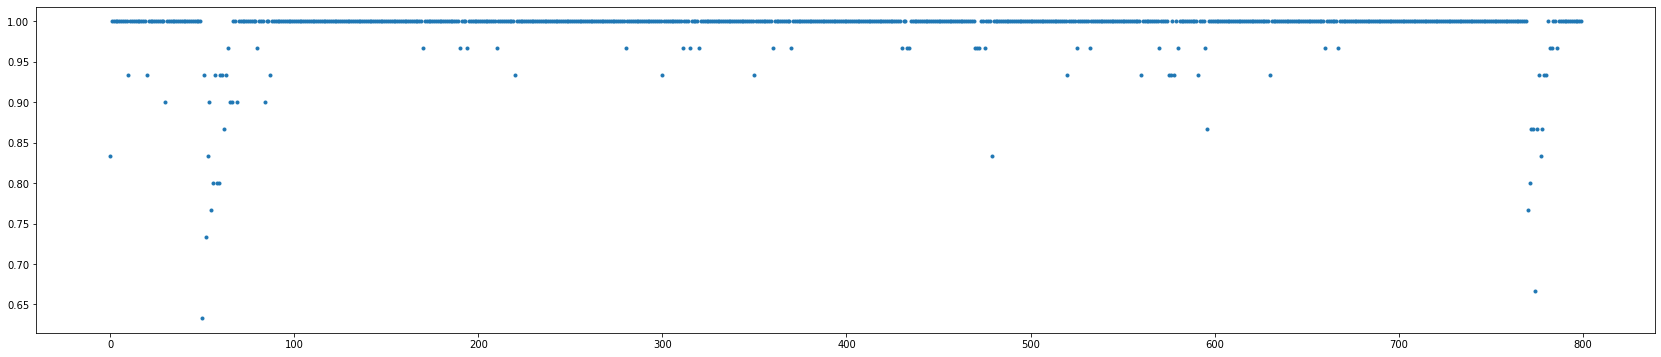

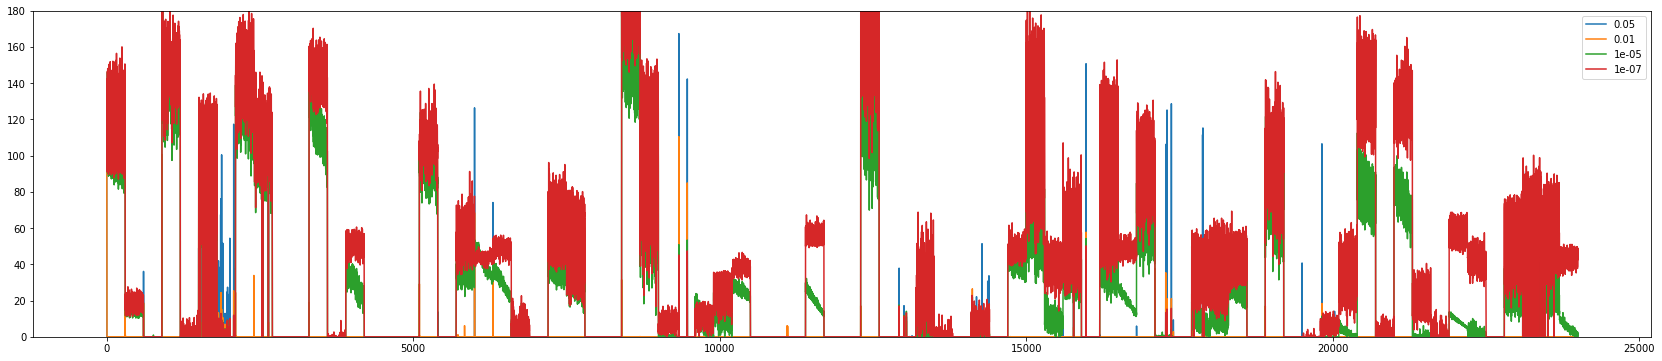

100%|██████████| 4/4 [00:41<00:00, 10.41s/it]

with  20 and step size 0.01 principal components the MIE is:  0.11811807182901365
Resolving phrase for min error: 0.11811807182901365, learning rate: 0.01 predictors: 20 
W
n
t
r
C
o
m
i
n
g


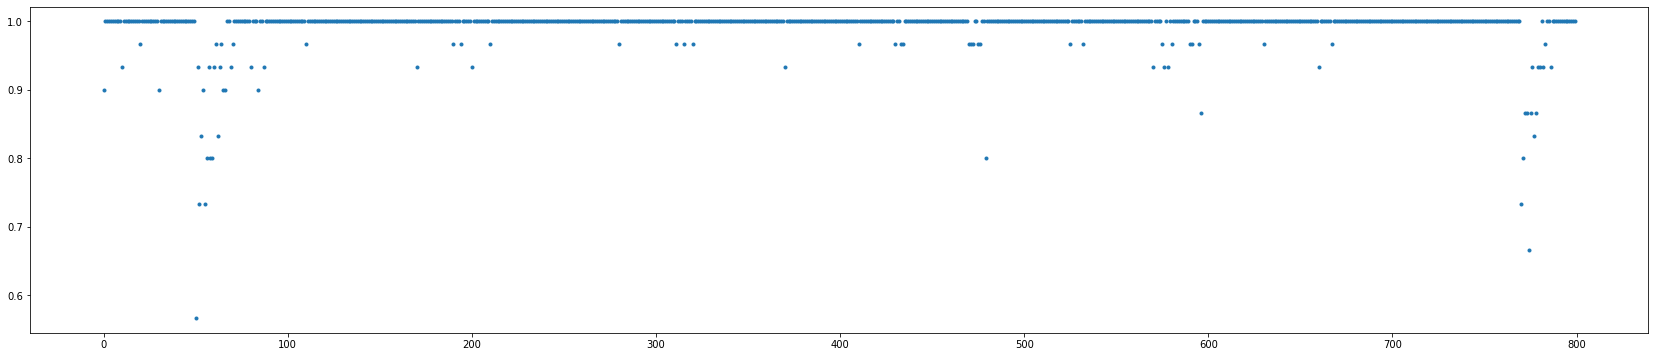

In [ ]:
instant_error_on_training_data(T_eig,T_eig_test,y_train,time_test)

##Beta variation during Time

In [ ]:
def gradient_descent(x_list,y_list,X_test,p,stepSize,timeTest):
    np.random.seed(seed=2023)
    beta=np.random.randn(1,p)
    tot_error = []
    test_preds = []
    matrice = np.empty((24000,p))
    pos=0
    print(x_list.shape)
    for i,tmp in enumerate(zip(x_list,y_list)):
        matrice[i] = beta
        x=tmp[0]
        y=tmp[1]
        y_pred = np.dot(beta,x)
        #log (1 + e^−y x⊤β)
        istant_error = math.log(1 + math.exp(-y*y_pred))
        tot_error.append(istant_error)
        grads = (-y*x)/(1 + math.exp(y*y_pred))
        gradiente = np.matrix(stepSize*grads)
        beta = beta - gradiente
        if i+1==timeTest[pos]:
          test_pred = np.dot(beta,X_test[pos])
          if test_pred>0:
            test_preds.append(1)
          else:
            test_preds.append(0)
          pos+=1
    utilPlot(matrice,)    
    return test_preds,np.mean(np.array(tot_error))
def utilPlot(matrice,step_size=1):
    for x in range(0,matrice.shape[1]):
        fig, ax = plt.subplots()
        ax.plot(list(range(0,len(matrice[:3000:step_size,x]))),matrice[:3000:step_size,x], label='value')
        ax.set_xticks(np.arange(0, 3000, 300))
        ax.grid(True,axis='x')
        plt.title('Beta per principal component '  +str(x+1))
        plt.show()

In [ ]:
def evaluatePerformance(X_train,X_test,y_train,time_test):
    p=5
    stepSize = 0.01
    test_predictions,tot_error = gradient_descent(X_train[:,:p],y_train,X_test[:,:p],p,stepSize,time_test)
  

(24000, 5)


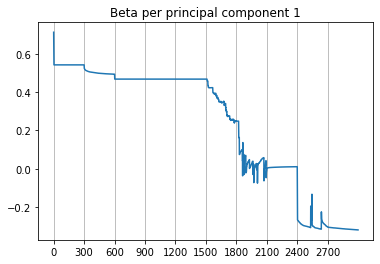

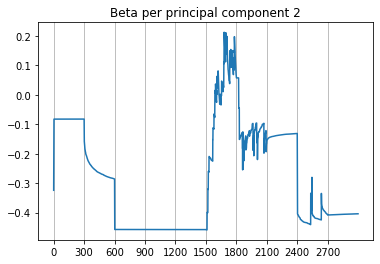

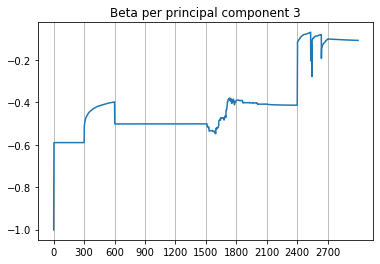

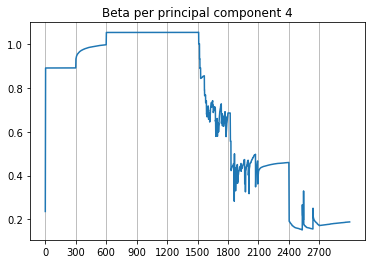

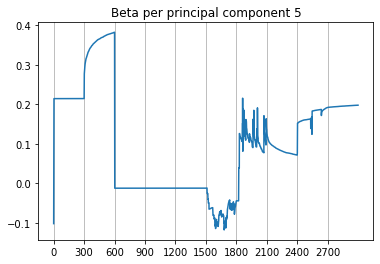

In [ ]:
evaluatePerformance(X_pca,X_pca_test,y_train,time_test)

##Analysis on test samples predictions

100%|██████████| 19/19 [01:57<00:00,  6.21s/it]


Resolving phrase for min error: 0.036929657382087984, learning rate: 0.01 predictors: 5 
{1: [0.11840885303751203, 0.1518592867391947, 1.5679015951289208, 5.252282107379176], 2: [0.09794927066542782, 0.06830074311851138, 1.6967575006510782, 6.985976076142604], 3: [0.1229697559496304, 0.05736245866943012, 3.6125037892376954, 10.040005621845976], 4: [0.10974574284153103, 0.03866060103292907, 3.2650746497595793, 11.354277059496681], 5: [0.11533148907133076, 0.036929657382087984, 3.240695012024633, 11.388216708682073], 6: [0.16327657997688508, 0.04669987941469162, 5.411159084387106, 15.522428323086528], 7: [0.16717369720877343, 0.06307604419371886, 16.53158439976744, 27.986476487393986], 8: [0.1817363925321601, 0.06835123394583267, 17.269409100881315, 28.28062940237611], 9: [0.20416232650240349, 0.06941858897419373, 17.212521630613633, 28.215827405741624], 10: [0.24213468125666068, 0.09537683179493422, 25.271970992036774, 36.50707505349054], 11: [0.24930729494055887, 0.10113964367224189, 2

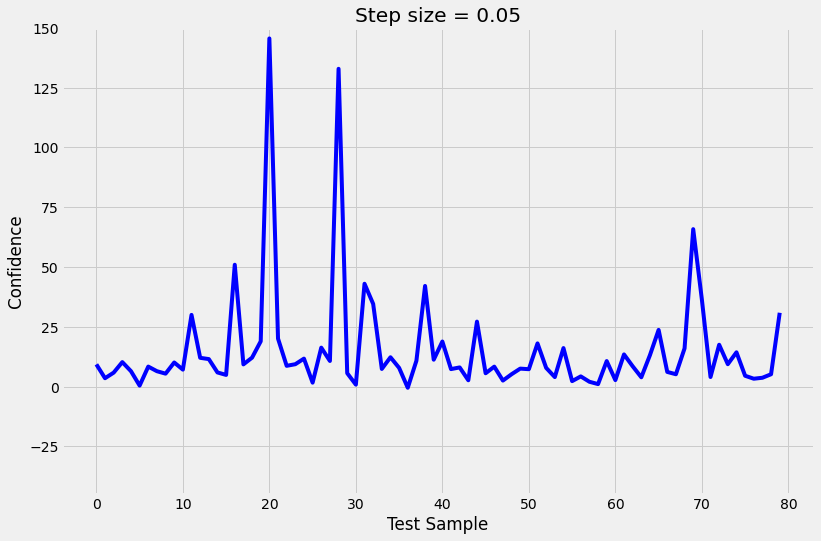

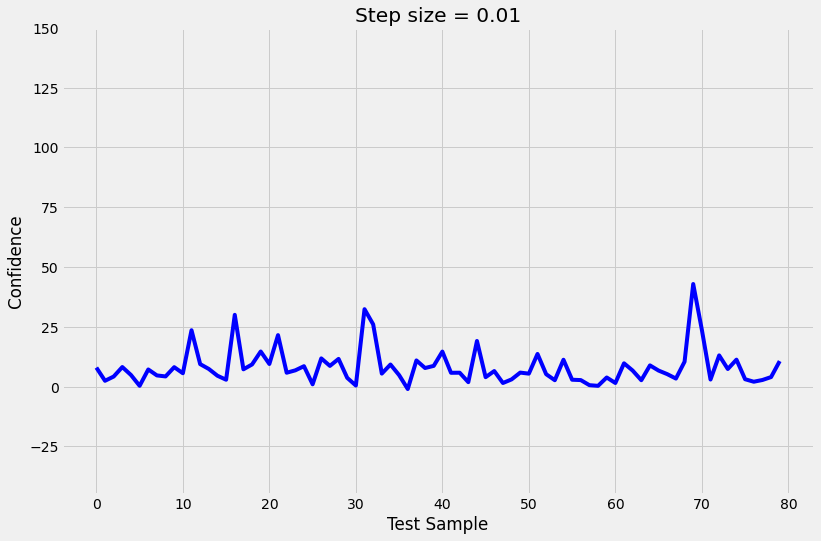

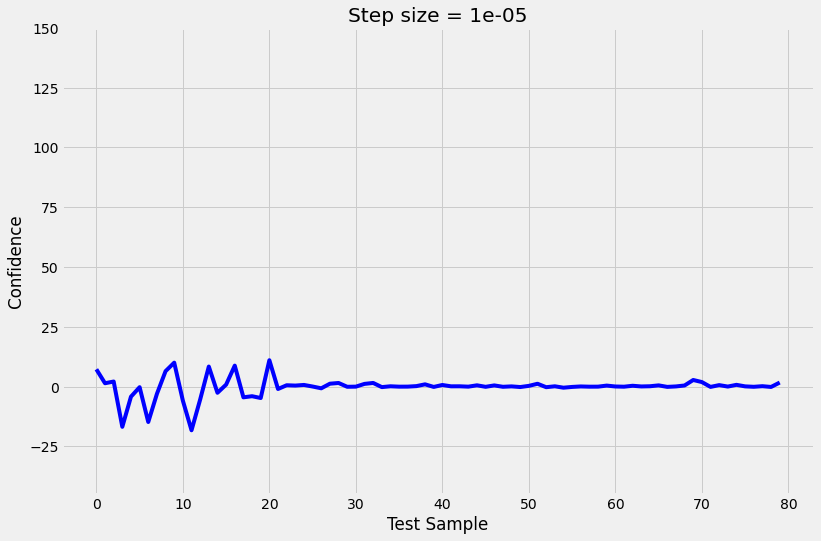

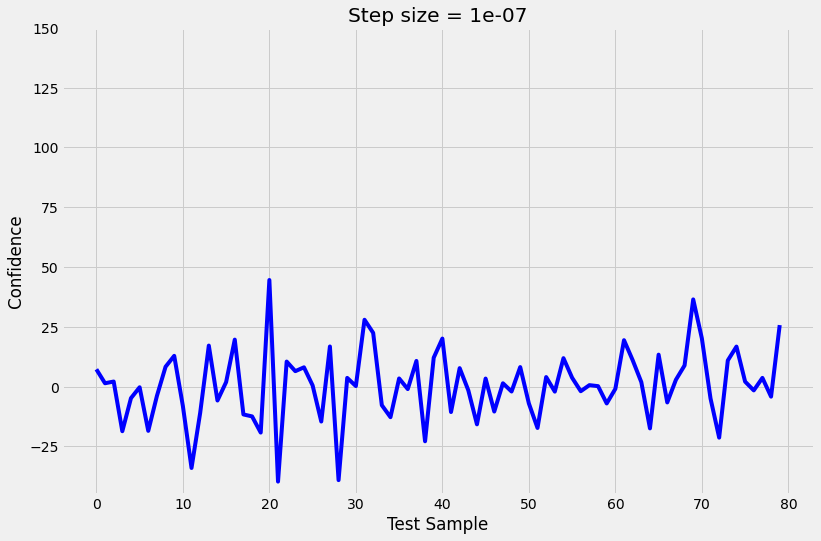

W
n
t
r
C
o
m
i
n
g


In [ ]:
def gradient_descent(x_list,y_list,X_test,p,stepSize,timeTest):
    np.random.seed(seed=2023)
    beta=np.random.randn(1,p)
    tot_error = []
    test_preds = []
    test_error = []
    preds_list = []
    pos=0
    for i,tmp in enumerate(zip(x_list,y_list)):
        x=tmp[0]
        y=tmp[1]
        y_pred = np.dot(beta,x)
        #log (1 + e^−y x⊤β)
        istant_error = math.log(1 + math.exp(-y*y_pred))
        tot_error.append(istant_error)
        grads = (-y*x)/(1 + math.exp(y*y_pred))
        gradiente = np.matrix(stepSize*grads)
        beta = beta - gradiente
        if i+1==timeTest[pos]:
          test_pred = np.dot(beta,X_test[pos])
          preds_list.append(test_pred.item(0))
          if test_pred>0:
            test_preds.append(1)
          else:
            test_preds.append(0)
          pos+=1
    return test_preds,np.mean(np.array(tot_error)),preds_list
def test_error_evaluation(preds_list,y_test):
  i=0 
  confidence = []
  for elem in preds_list:
    t = y_test[i]
    if t == '1':
      confidence.append(elem)
    else:
      if elem < 0:
        confidence.append(abs(elem))
      else:
        confidence.append(-elem)
    i+=1
  return confidence    
def evaluatePerformanceAndPhrase(X_train,X_test,y_train,time_test,y_test):
    predictor = []
    learning_rate = []
    MIE = []
    actual_min = (1000,1e-10,20)
    list_preds = []
    MIE_for_pred={}
    for p in tqdm(range(1, X_train.shape[1])):
        MIE = []
        for stepSize in [5e-2,1e-2,1e-5,1e-7]:
            test_predictions,tot_error,pred_list = gradient_descent(X_train[:,:p],y_train,X_test[:,:p],p,stepSize,time_test)
            list_preds.append(pred_list)
            if actual_min[0] > tot_error:
                actual_min = (tot_error,stepSize,p)
            predictor.append(p)
            learning_rate.append(stepSize)
            MIE.append(tot_error)
        MIE_for_pred[p]=MIE
    print(f'Resolving phrase for min error: {actual_min[0]}, learning rate: {actual_min[1]} predictors: {actual_min[2]} ' )
    p = actual_min[2]
    test_predictions,tot_error,pred_list = gradient_descent(X_train[:,:p],y_train,X_test[:,:p],p,actual_min[1],time_test)
    step = [5e-2,1e-2,1e-5,1e-7]
    i=0
    print(MIE_for_pred)
    for preds in list_preds:
      if i == 4:
        break
      confidence = test_error_evaluation(preds,y_test)
      plt.style.use('fivethirtyeight')
      fig = plt.figure(figsize=(12,8))
      ax = fig.add_subplot(111)
      ax.plot(range(80),confidence,'-b')
      # # Set labels
      ax.set_ylabel('Confidence')
      ax.set_xlabel('Test Sample')
      # # Show plot
      plt.title("Step size = " + str(step[i]))
      plt.style.use('fivethirtyeight')
      plt.ylim(-45,150)
      plt.show()
      i+=1
    for bit in range(int(len(test_predictions)/8)):
        tmp=test_predictions[(bit*8):(bit*8)+8]
        ret = "".join(str(e) for e in tmp)
        print(chr(int(ret, 2)))
y_test = "01010111011011100111010001110010010000110110111101101101011010010110111001100111"
evaluatePerformanceAndPhrase(T_eig,T_eig_test,y_train,time_test,y_test)

#Comparison with a simple naïve bayes approach

##Analyze if features are separable

In [4]:
# Load train and test datasets
train_data = sio.loadmat('train_8feb23.mat')
print(train_data)

X_train = train_data['train'][:, :20]
print(X_train.shape)
y_train = train_data['train'][:, 20:]
print(y_train.shape)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: lun feb  6 14:20:18 2023', '__version__': '1.0', '__globals__': [], 'train': array([[  7.69968463,   8.42526179, -10.05247494, ...,  -4.74738658,
          1.72596027,   1.        ],
       [-12.06932205, -11.60885741,  14.16523163, ...,   6.55461929,
         -4.20657085,  -1.        ],
       [-12.35724123, -10.09117283,  12.71493662, ...,   5.71478506,
         -5.99292909,  -1.        ],
       ...,
       [-12.22878449, -14.70876432,  14.01820412, ...,   4.95012939,
         17.67737151,  -1.        ],
       [ 14.54288034,  13.25617874,  -8.31619124, ...,  -2.89070714,
        -17.88757621,   1.        ],
       [ 14.03889992,  13.31103433,  -9.04225543, ...,  -3.15426186,
        -17.64826713,   1.        ]])}
(24000, 20)
(24000, 1)


In [5]:
#visualizzazione 2d
def plot_2D(X, y, target_names, f1, f2, fig_id):
  n_classes = 2
  values = [-1,1]
  # Minimum and maximum extraction
  x_min, x_max = X[:, f1].min() - .5, X[:, f1].max() + .5
  y_min, y_max = X[:, f2].min() - .5, X[:, f2].max() + .5
  # Figure creation
  plt.figure(fig_id, figsize=(8, 6))
  # Drawing the points
  colors = ['red','green']
  for i  in range(n_classes):
    plt.scatter(X[y_train[:,0]==values[i], f1], X[y_train[:,0]==values[i], f2], color=colors[i], marker ='.',linewidth = 0.3,label=target_names[i])
  plt.legend()
  # Axis labelling
  plt.xlabel("feature"+str(f1))
  plt.ylabel("feature"+str(f2))
  # Axis limitation
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  # Visualization
  plt.show()




In [ ]:
# Drawing dataset samples considering two features f1 and f2
target = ['-1','1']
for i in range(20):
  j=0
  while(i+j<20):
    f1=i
    f2=i+j
    j+=1
    plot_2D(X_train, y_train, target,f1, f2, 1)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#visualizzazione 1d
def plot_1D(X, y, target_names, f1, fig_id):
  n_classes = 2
  values = [-1,1]
  # Minimum and maximum extraction
  x_min, x_max = X[:, f1].min() - .5, X[:, f1].max() + .5
  y_min, y_max = 0.5, 1.5
  # Figure creation
  plt.figure(fig_id, figsize=(8, 4))
  # Drawing the points
  colors = ['red','green']
  for i  in range(n_classes):
    plt.scatter(X[y_train[:,0]==values[i], f1], np.ones(len(X[y_train[:,0]==values[i], f1])) ,color=colors[i], marker ='.',linewidth = 0.3,label=target_names[i])
  plt.legend()
  # Axis labelling
  plt.xlabel("feature"+str(f1))
  # Axis limitation
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  # Visualization
  plt.show()

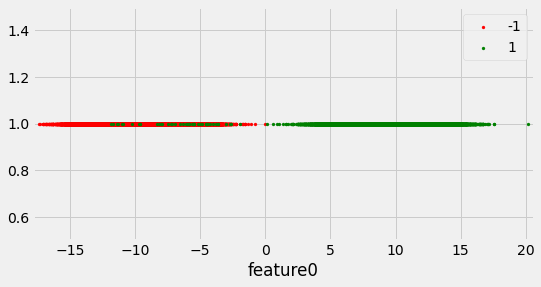

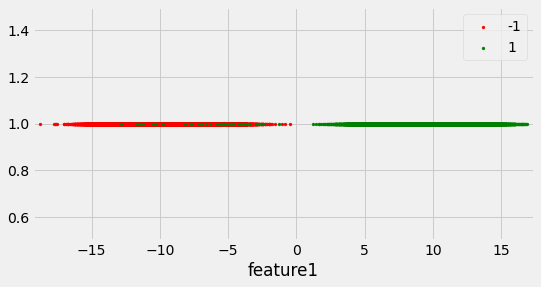

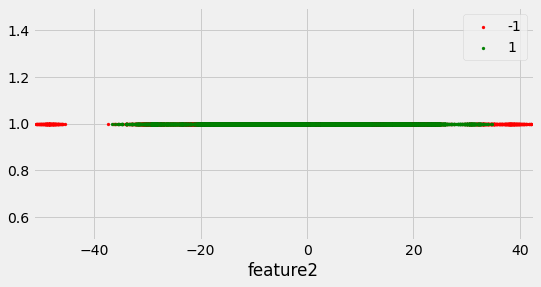

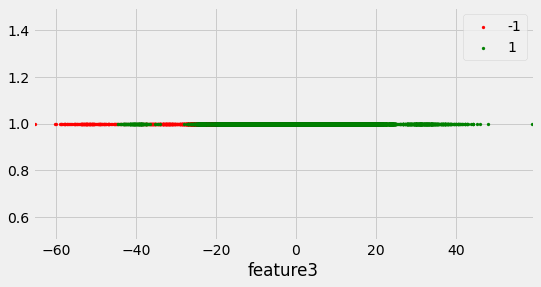

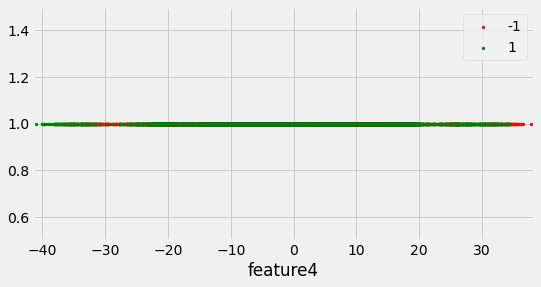

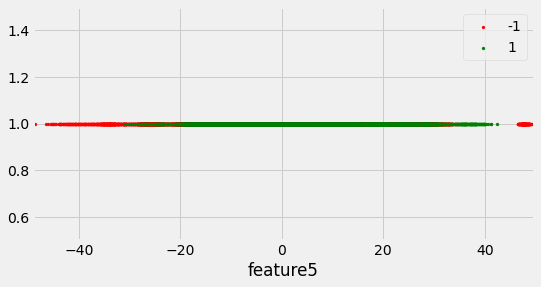

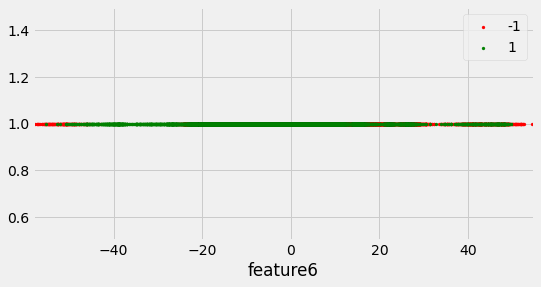

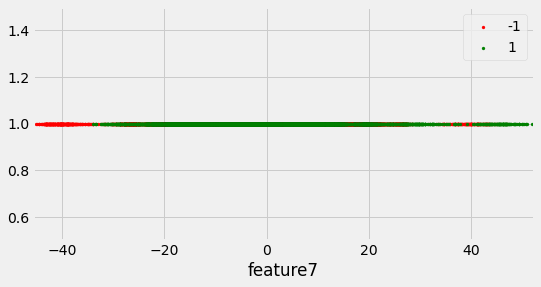

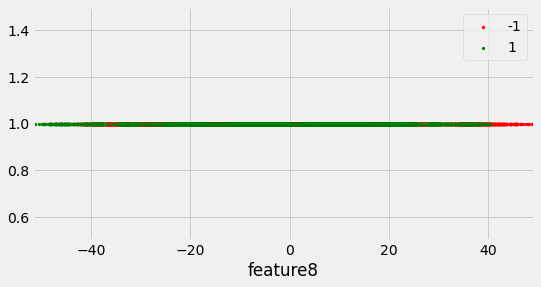

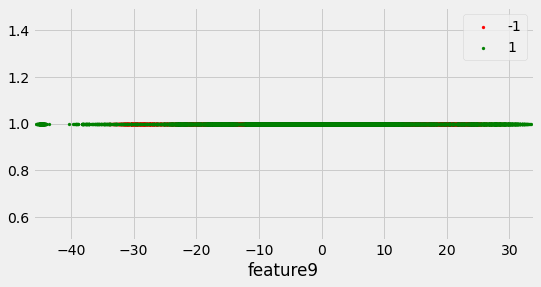

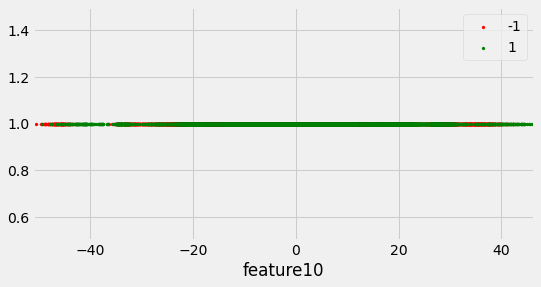

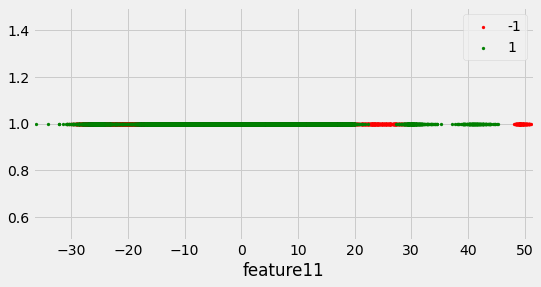

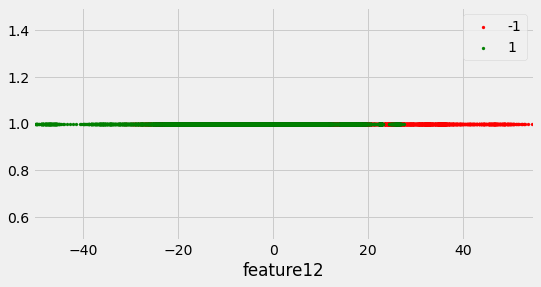

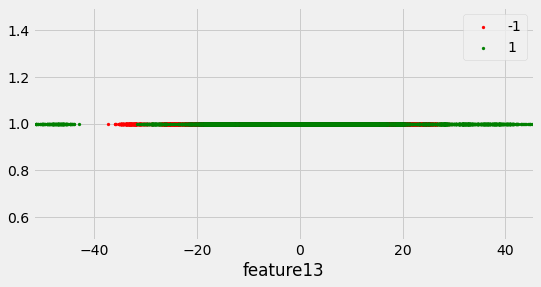

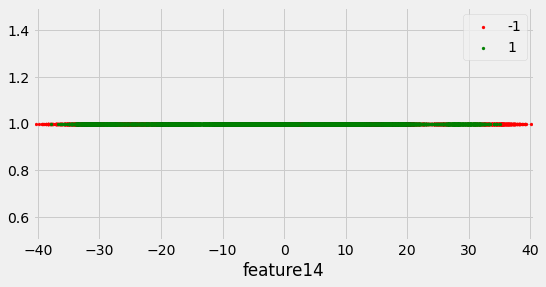

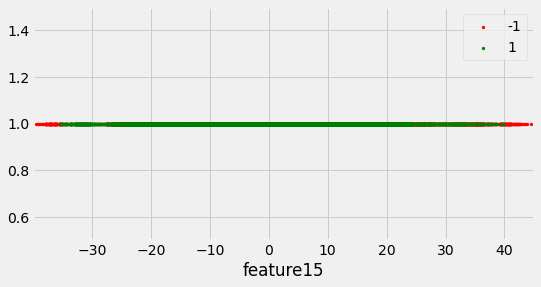

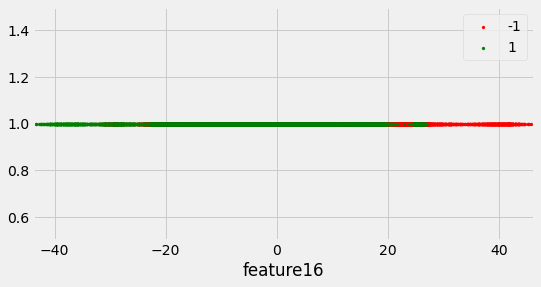

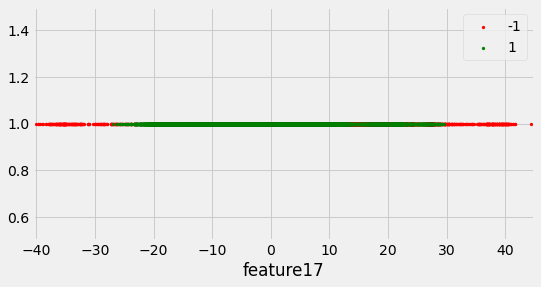

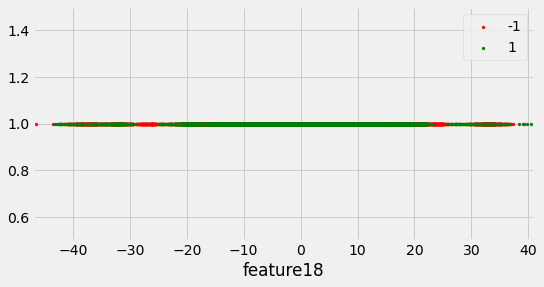

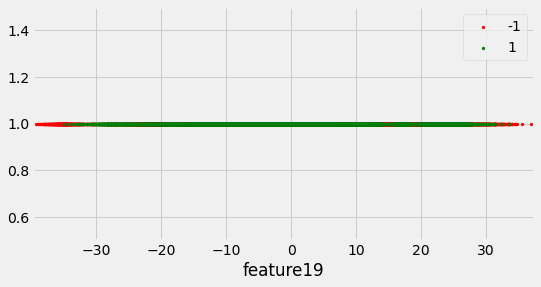

In [ ]:
target = ['-1','1']
for i in range(20):
  plot_1D(X_train, y_train, target,i, 1)

###Naive Bayes approach

In [ ]:
test_data = sio.loadmat('test_8feb23.mat')
X_test = test_data['test'][:, :20]
time_test = test_data['test'][:, 20:]
time_test = test_data['test'][:, 20:]

In [ ]:
#features selection
import math

features_to_consider = [1]

naive_predictions = []#prediction obtained for test samples using naive bayes approach.

for i,pred_index in enumerate(time_test):
  mean_pos = [] #mean of values whose output is 1 for each feature in order
  mean_neg = [] #mean of values whose output is -1 for each feature in order
  var_pos = [] #var of values whose output is 1 for each feature in order
  var_neg = [] #var of values whose output is -1 for each feature in order
  gen_pos = [] #generative model for output 1 for each feature in order
  gen_neg = [] #generative model for output -1 for each feature in order

  pred_int_index = int(pred_index)
  #when arrive the moment of prediction estimate mean and variance with samples obtained so far
  X_train_to_now = X_train[:pred_int_index,:]
  y_train_to_now = y_train[:pred_int_index]
  
  for j,feature in enumerate(features_to_consider):
    mean_pos.append(np.mean(X_train_to_now[y_train_to_now[:,0]==1, feature]))
    mean_neg.append(np.mean(X_train_to_now[y_train_to_now[:,0]==-1, feature]))
    var_pos.append(np.var(X_train_to_now[y_train_to_now[:,0]==1, feature]))
    var_neg.append(np.var(X_train_to_now[y_train_to_now[:,0]==-1, feature]))
    prior_y_pos = len(y_train_to_now[y_train_to_now[:,0]==1])/len(y_train_to_now)
    prior_y_neg = len(y_train_to_now[y_train_to_now[:,0]==-1])/len(y_train_to_now)
    gen_pos.append(1/math.sqrt(2*math.pi*var_pos[j]) * math.exp(-(X_test[i][feature]-mean_pos[j])**2/(2*var_pos[j])))
    gen_neg.append(1/math.sqrt(2*math.pi*var_neg[j]) * math.exp(-(X_test[i][feature]-mean_neg[j])**2/(2*var_neg[j])))
  #now compute the total generative function for pos and neg
  total_gen_pos = np.prod(np.array(gen_pos))
  total_gen_neg = np.prod(np.array(gen_neg))
  #compute the a posterior probability
  pos = prior_y_pos*total_gen_pos
  neg = prior_y_neg*total_gen_neg
  if(pos>neg):
    naive_predictions.append(1)
  else:
    naive_predictions.append(0) #qua in realtà sarebbe meno 1 ma cosi mi viene piu comodo per la conversione


out = ""
for bit in range(int(len(naive_predictions)/8)):
        tmp=naive_predictions[(bit*8):(bit*8)+8]
        ret = "".join(str(e) for e in tmp)
        out+=ret
        print(chr(int(ret, 2)))
print(out)


W
n
t
r
C
o
m
i
n
g
01010111011011100111010001110010010000110110111101101101011010010110111001100111


# The Final Sentences
The suggestion obtained from the analysis of these data turns out to be: **"WntrComing"**<br>
We can interpetate it as: **"WinterComing"**<br>
The suggestion of the first part was: **"GoT"**<br>


So the final senteces was:<br>
**"“Winter is coming, we know what’s coming with it. We can learn to live with the wildlings, or we can add them to the army of the dead.”"** <br>
**-Jon Snow** in **Game of Thrones**

